# **`DECISION TREE - 2`**

## You are a data scientist working for a healthcare company, and you have been tasked with creating a decision tree to help identify patients with diabetes based on a set of clinical variables. You have been given a dataset (diabetes.csv) with the following variables:
1. Pregnancies: Number of times pregnant (integer)
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
4. SkinThickness: Triceps skin fold thickness (mm) (integer)
5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history) (float)
8. Age: Age in years (integer)
9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

https://drive.google.com/file/d/1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2/view?

usp=sharing

By following these steps, you can develop a comprehensive understanding of decision tree modeling and
its applications to real-world healthcare problems. Good luck!

## Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
plt.style.use("ggplot")

In [4]:
df = pd.read_csv("diabetes.csv")

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.shape

(768, 9)

In [9]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

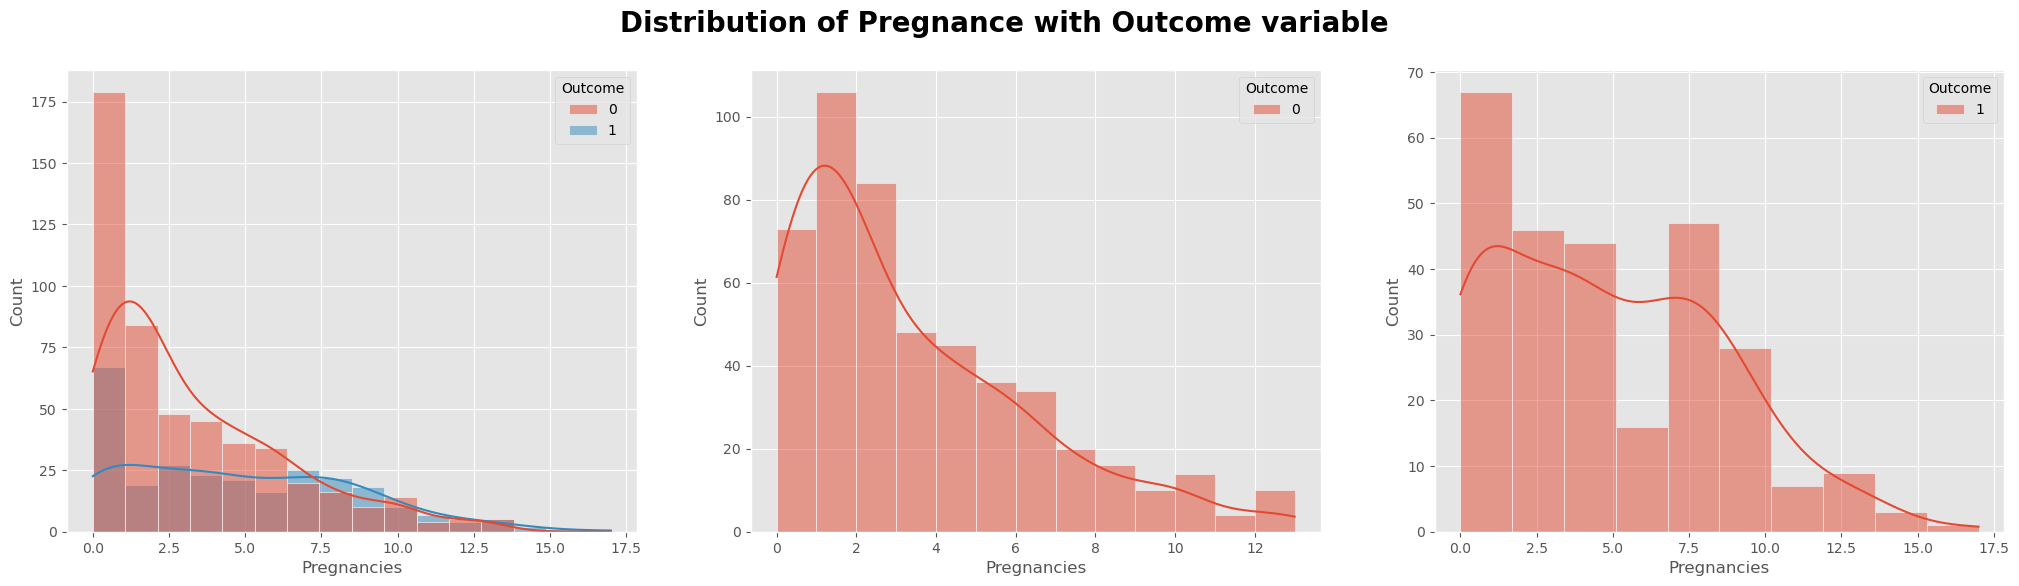

In [8]:
plt.subplots(1,3,figsize= (25,6))
plt.subplot(131)
sns.histplot(data=df,x="Pregnancies",kde=True,hue="Outcome")
plt.subplot(132)
sns.histplot(data=df[df.Outcome == 0],x="Pregnancies",kde=True,hue="Outcome")
plt.subplot(133)
sns.histplot(data=df[df.Outcome == 1],x="Pregnancies",kde=True,hue="Outcome")
plt.suptitle("Distribution of Pregnance with Outcome variable",fontweight="bold",size=20)
plt.show()

## Insights:
1. Diabetes is associated with higher number of pregnancies on an average
2. Both distributions are right skewed 

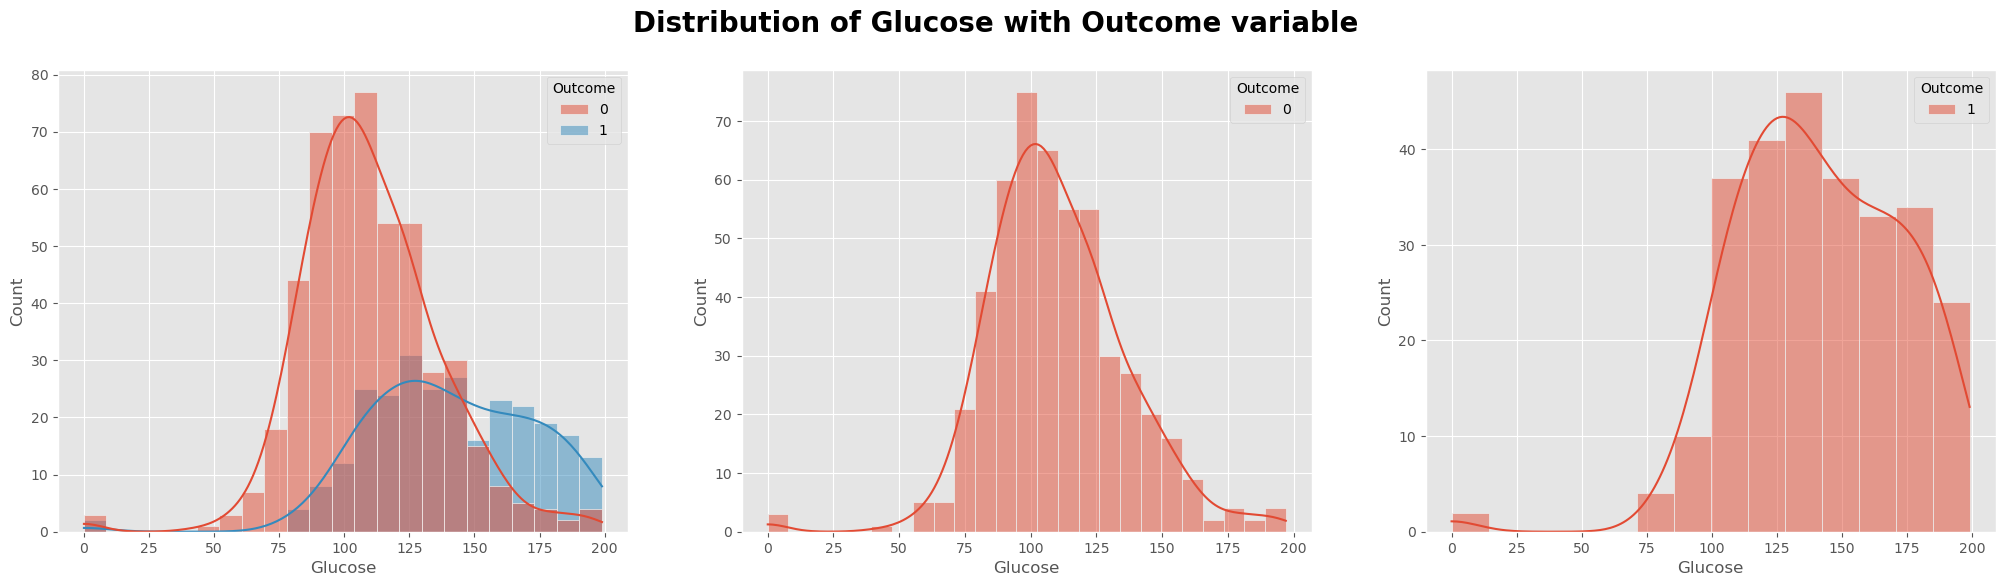

In [10]:
plt.subplots(1,3,figsize= (25,6))
plt.subplot(131)
sns.histplot(data=df,x="Glucose",kde=True,hue="Outcome")
plt.subplot(132)
sns.histplot(data=df[df.Outcome == 0],x="Glucose",kde=True,hue="Outcome")
plt.subplot(133)
sns.histplot(data=df[df.Outcome == 1],x="Glucose",kde=True,hue="Outcome")
plt.suptitle("Distribution of Glucose with Outcome variable",fontweight="bold",size=20)
plt.show()

## Insight
1. Those without diabetes had a normal distribution of glucose level with mean close to 100
2. Those with diabetes show a broad distribution of glucose levels which is spread out and had higher average glucose.

In [ ]:
plt.subplots(1,3,figsize= (25,6))
plt.subplot(131)
sns.histplot(data=df,x="BloodPressure",kde=True,hue="Outcome")
plt.subplot(132)
sns.histplot(data=df[df.Outcome == 0],x="BloodPressure",kde=True,hue="Outcome")
plt.subplot(133)
sns.histplot(data=df[df.Outcome == 1],x="BloodPressure",kde=True,hue="Outcome")
plt.suptitle("Distribution of BloodPressure with Outcome variable",fontweight="bold",size=20)
plt.show()

## Insight
1. Blood pressure is noramlly distributed between both outcomes and those with diabtes had a slighly higher average BP.

In [ ]:
plt.subplots(1,3,figsize= (25,6))
plt.subplot(131)
sns.histplot(data=df,x="SkinThickness",kde=True,hue="Outcome")
plt.subplot(132)
sns.histplot(data=df[df.Outcome == 0],x="SkinThickness",kde=True,hue="Outcome")
plt.subplot(133)
sns.histplot(data=df[df.Outcome == 1],x="SkinThickness",kde=True,hue="Outcome")
plt.suptitle("Distribution of SkinThickness with Outcome variable",fontweight="bold",size=20)
plt.show()

## Insights:
1. Skin thickness on an average is higher in diabetics
2. Skin thickness follows a near normal distribution

In [ ]:
plt.subplots(1,3,figsize= (25,6))
plt.subplot(131)
sns.histplot(data=df,x="Insulin",kde=True,hue="Outcome")
plt.subplot(132)
sns.histplot(data=df[df.Outcome == 0],x="Insulin",kde=True,hue="Outcome")
plt.subplot(133)
sns.histplot(data=df[df.Outcome == 1],x="Insulin",kde=True,hue="Outcome")
plt.suptitle("Distribution of Insulin with Outcome variable",fontweight="bold",size=20)
plt.show()

## Insights:
1. Insulin levels are slighgtly higher on an average in diabetics
2. It follows a right skewed distribution

In [ ]:
plt.subplots(1,3,figsize= (25,6))
plt.subplot(131)
sns.histplot(data=df,x="BMI",kde=True,hue="Outcome")
plt.subplot(132)
sns.histplot(data=df[df.Outcome == 0],x="BMI",kde=True,hue="Outcome")
plt.subplot(133)
sns.histplot(data=df[df.Outcome == 1],x="BMI",kde=True,hue="Outcome")
plt.suptitle("Distribution of BMI with Outcome variable",fontweight="bold",size=20)
plt.show()

## Insights:
1. BMI are higher on an average in diabetics
2. BMI follows normal distribution

In [ ]:
plt.subplots(1,3,figsize= (25,6))
plt.subplot(131)
sns.histplot(data=df,x="DiabetesPedigreeFunction",kde=True,hue="Outcome")
plt.subplot(132)
sns.histplot(data=df[df.Outcome == 0],x="DiabetesPedigreeFunction",kde=True,hue="Outcome")
plt.subplot(133)
sns.histplot(data=df[df.Outcome == 1],x="DiabetesPedigreeFunction",kde=True,hue="Outcome")
plt.suptitle("Distribution of DiabetesPedigreeFunction with Outcome variable",fontweight="bold",size=20)
plt.show()

## Insights:
1. DiabetesPedigreeFunction is almost equally distributed among both outcomes
2. It follows a right skewed distribution

In [ ]:
plt.subplots(1,3,figsize= (25,6))
plt.subplot(131)
sns.histplot(data=df,x="Age",kde=True,hue="Outcome")
plt.subplot(132)
sns.histplot(data=df[df.Outcome == 0],x="Age",kde=True,hue="Outcome")
plt.subplot(133)
sns.histplot(data=df[df.Outcome == 1],x="Age",kde=True,hue="Outcome")
plt.suptitle("Distribution of Age with Outcome variable",fontweight="bold",size=20)
plt.show()

## Insights:
1. Age on an average is more in diabetics
2. It follows a right skewed distribution

In [ ]:
#pairplots
plt.figure(figsize=(15,12))
sns.pairplot(df)
plt.show()

In [ ]:
## checking correlation.
plt.figure(figsize=(10,10))
sns.heatmap(df.corr().round(2),annot=True)

## Insights
1. Outcome shows fair correlation with glucose (0.47) , BMI (0.29) ,  Age (0.24) and Pregnancies (0.22)

In [10]:
##missing values --> None
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
#description
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Insights
1. Glucose , BP , SkinThickness and BMI cannot be zero

In [12]:
## rectifying the errors
df.Glucose = df.Glucose.replace(0,np.mean(df.Glucose))
df.BloodPressure = df.BloodPressure.replace(0,np.mean(df.BloodPressure))
df.SkinThickness = df.SkinThickness.replace(0,np.mean(df.SkinThickness))
df.BMI = df.BMI.replace(0,np.mean(df.BMI))

In [13]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,79.799479,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,115.244002,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


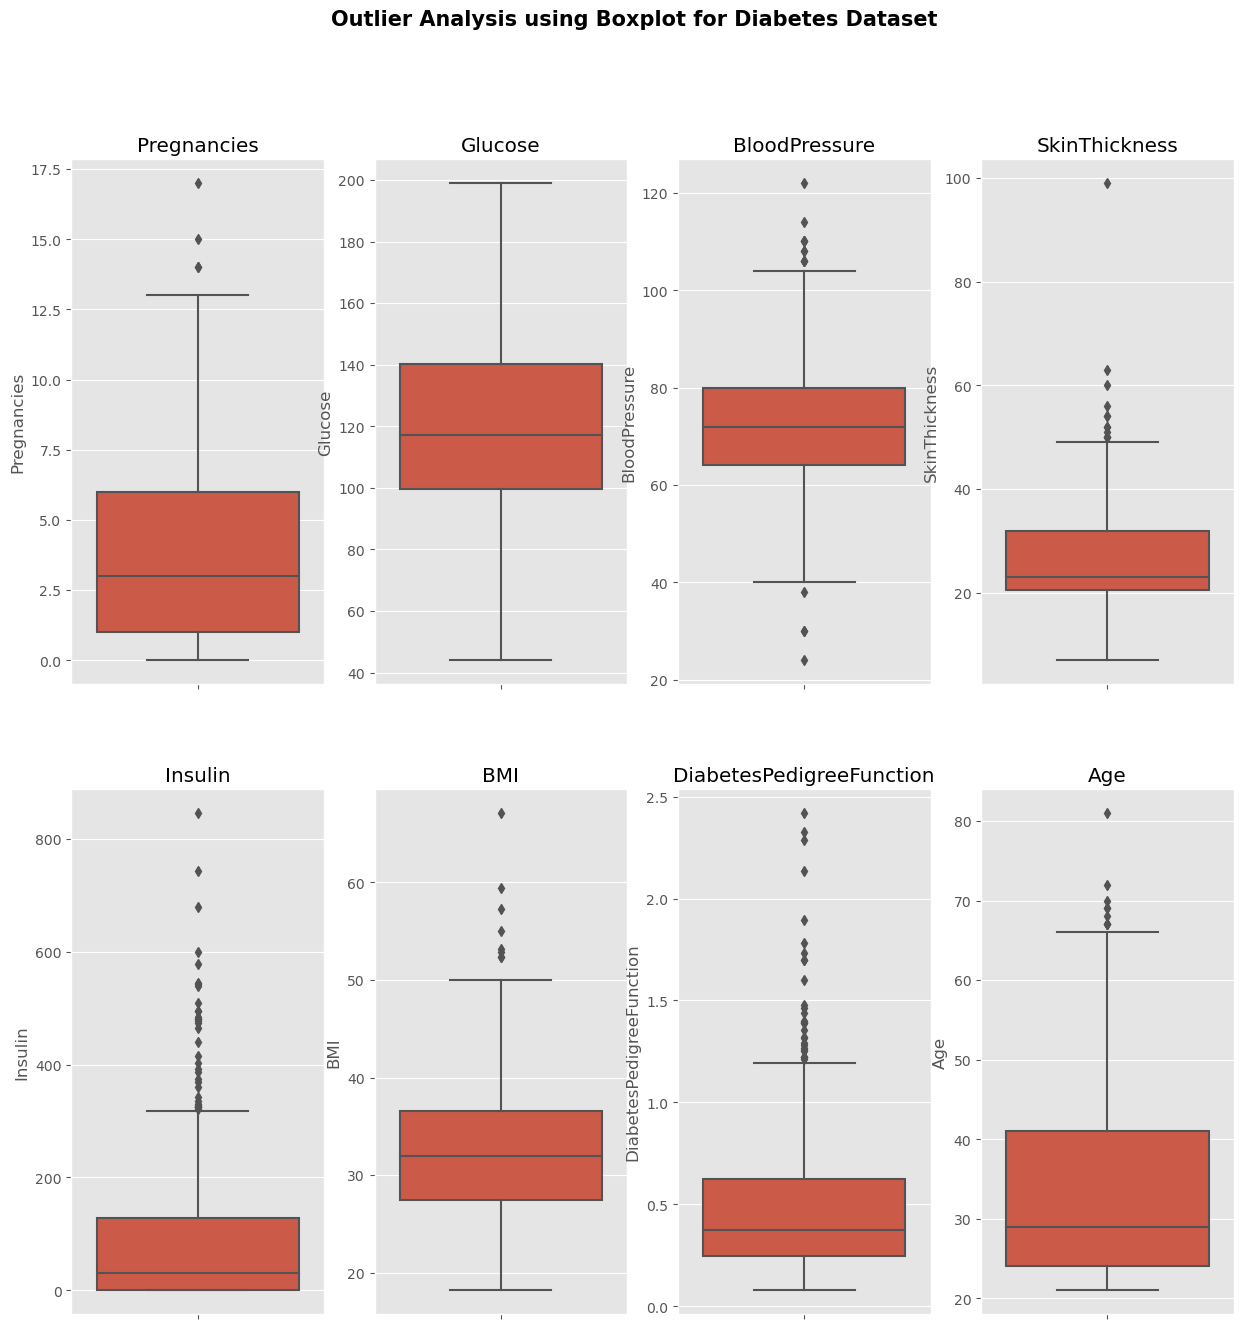

In [16]:
plt.subplots(nrows=2, ncols=4, figsize = (15,15), squeeze=True)
plt.suptitle("Outlier Analysis using Boxplot for Diabetes Dataset" , fontweight = "bold" , size = 15)
for i in range(len(df.columns)-1):
    ax = plt.subplot(2,4,i+1)
    sns.boxplot(data=df,y=df.columns[i],ax=ax,hue="Outcome")
    ax.set_title(f"{df.columns[i]}")

## Insights
Outliers in 'Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'

In [14]:
data  = df.copy()

In [15]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,0,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,0,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,0,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,0,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,0,30.1,0.349,47,1


In [16]:
#function to remove outlier
def remove_outliers(x):
    q3 = np.quantile(df[x],0.75)
    q1 = np.quantile(df[x],0.25)
    IQR = (q3 - q1)
    lower = q1 - (1.5*IQR)
    upper = q3 + (1.5*IQR)
    final = data[(data[x] > lower) & (data[x] <upper)]
    return final

In [17]:
outlier_col = ['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [18]:
for i in outlier_col:
    data = remove_outliers(i)

In [19]:
#final data
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,0,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,0,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,0,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94,28.1,0.167,21,0
5,5,116.0,74.0,20.536458,0,25.6,0.201,30,0


In [20]:
## Features
X = data.iloc[:,:-1]
## target
y = data.iloc[:,-1]

In [21]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,0,33.6,0.627,50
1,1,85.0,66.0,29.000000,0,26.6,0.351,31
2,8,183.0,64.0,20.536458,0,23.3,0.672,32
3,1,89.0,66.0,23.000000,94,28.1,0.167,21
5,5,116.0,74.0,20.536458,0,25.6,0.201,30


In [23]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.33 , random_state=43)

In [24]:
X_train.shape , X_test.shape

((444, 8), (220, 8))

`Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use
cross-validation to optimize the hyperparameters and avoid overfitting.`

In [26]:
parameter = {
   "criterion":['gini', 'entropy', 'log_loss'],
    "splitter" : ["best","random"],
    "max_depth" :[1,2,3,4,5],
    "max_features" : ['auto', 'sqrt', 'log2']
}

In [27]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

In [28]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(classifier,param_grid=parameter,scoring="accuracy",cv=10)

In [29]:
clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [30]:
#best parameters
clf.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'best'}

In [31]:
#configuring the classifier
classifier = DecisionTreeClassifier(criterion ='log_loss',max_depth= 4, max_features = 'log2',splitter = 'best')

In [32]:
#final model
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=4, max_features='log2')

In [33]:
y_pred = classifier.predict(X_test)

`Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.`

In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
score = accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))

0.759090909090909
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       155
           1       0.59      0.62      0.60        65

    accuracy                           0.76       220
   macro avg       0.71      0.72      0.71       220
weighted avg       0.76      0.76      0.76       220



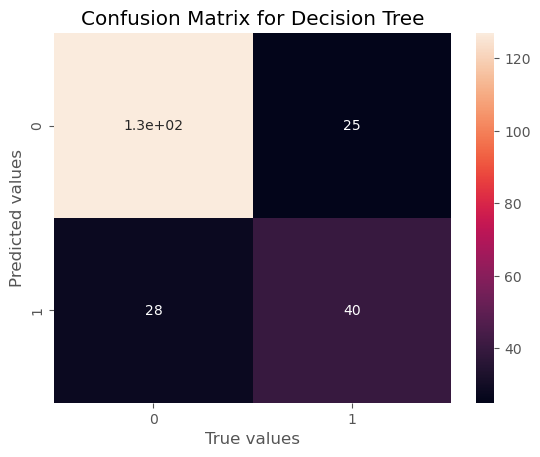

In [35]:
## confusion matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("Confusion Matrix for Decision Tree")
plt.show()

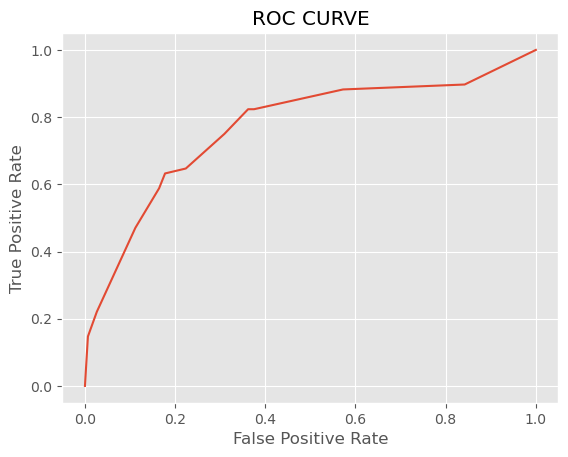

In [36]:
from sklearn.metrics import roc_curve
#define metrics
y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC CURVE")
plt.show()

`Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.`

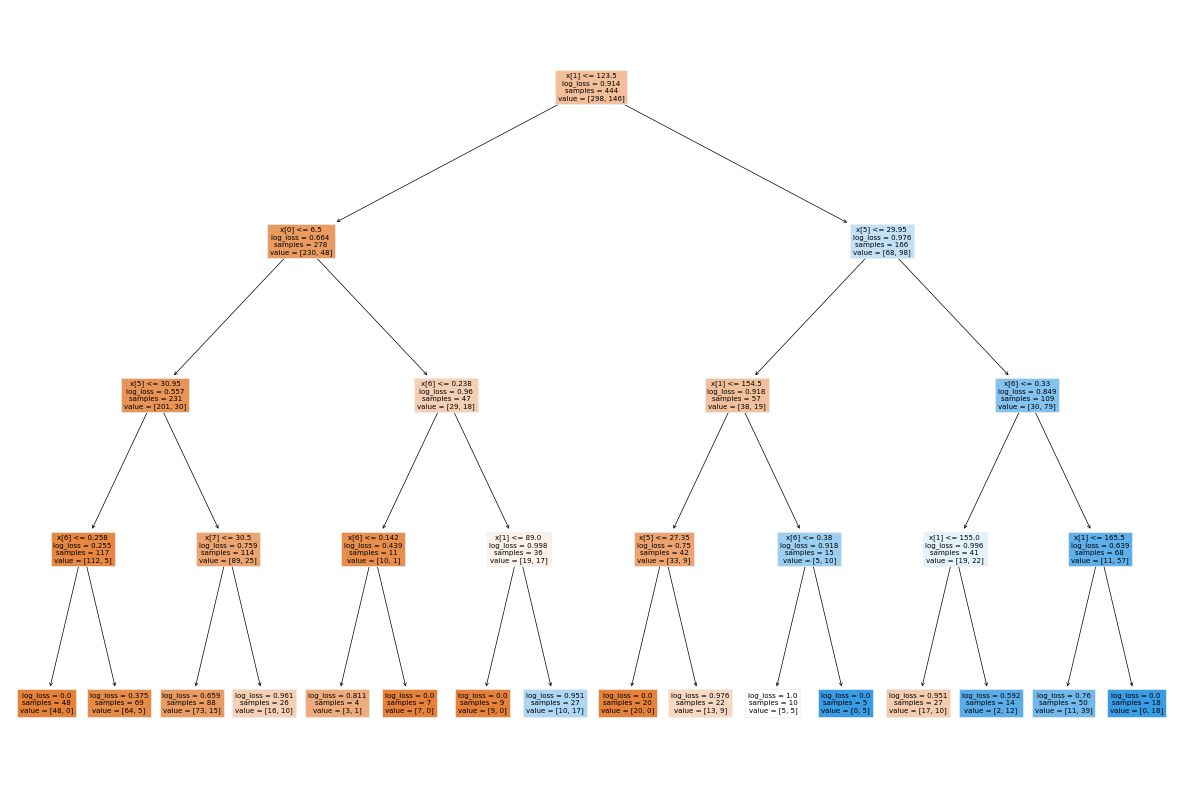

In [37]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(classifier,filled=True)
plt.show()

In [38]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,0,33.6,0.627,50
1,1,85.0,66.0,29.000000,0,26.6,0.351,31
2,8,183.0,64.0,20.536458,0,23.3,0.672,32
3,1,89.0,66.0,23.000000,94,28.1,0.167,21
5,5,116.0,74.0,20.536458,0,25.6,0.201,30
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180,32.9,0.171,63
764,2,122.0,70.0,27.000000,0,36.8,0.340,27
765,5,121.0,72.0,23.000000,112,26.2,0.245,30
766,1,126.0,60.0,20.536458,0,30.1,0.349,47


## Insights from the tree:
1. The split starts with Pregnancy <= 6.5 
2. The important nodes at level 1 split age < = 30.5 and age <= 27.5
3. The important nodes at level 2 split are Glucose <= 93.5 , BMI <= 26.45 , Diabetes Pedigree Fun <= 0.338 , age <= 41.5
4. The important nodes at level 3 split pregancncy <= 6.5 , BMI <= 24.25 , glucose <= 133 and <= 110 and age = 38.5

The tree has been pruned to level 3 to avoid over fitting

As per domain knwoledge it makes perfect sense that Diabetes occurs more commonly with higher pregnancies, increase in age , high blood sugar , incrase in BMI and Greater diabetes pedigree and the tree splitting has again used these factors at various threshold

`Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.`

In [39]:
#feeding new data to classifer to predict
data = np.array([3,160,80,35,100,33,0.351,50])

In [40]:
classifier.predict([data])

array([1])

## Observation:
model predicts 1 which is consistent with the data provided and this can be repeated to confirm the robustness of the model

`Sensitivity Analysis`: Sensitivity analysis helps to understand how changes in input variables affect the output of a model. For a decision tree classifier model, you can perform sensitivity analysis by evaluating the importance of each feature in the model. The importance of each feature can be calculated using the feature_importances_ attribute of the model. 

In [41]:
importance  = classifier.feature_importances_

In [42]:
# Print the feature importance
for i, imp in enumerate(importance):
    print(f"Feature {i}: {imp:.3f}")

Feature 0: 0.065
Feature 1: 0.539
Feature 2: 0.000
Feature 3: 0.000
Feature 4: 0.000
Feature 5: 0.241
Feature 6: 0.133
Feature 7: 0.022


#### Glucose seems to be most sensitive feature as per the model which is in agreement with common knwoledge

`Scenario Testing`: Scenario testing helps to evaluate the performance of a model under different scenarios or conditions. For a decision tree classifier model, you can perform scenario testing by evaluating the model performance on different subsets of the data or by introducing noise or errors in the data.

In [43]:
## Accuracy of the model
print(f"The accuracy of the model is {score:.3f}")

The accuracy of the model is 0.759


In [44]:
# Introduce noise in the testing set
X_test_noisy = X_test + np.random.normal(0, 0.1, X_test.shape)

In [45]:
X_test_noisy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
502,5.934195,120.987699,68.171020,40.834324,-0.040870,39.042416,0.637537,40.973202
344,8.075615,95.008419,72.084319,20.592720,-0.141446,36.738147,0.472668,57.100418
588,2.805437,175.869964,86.183685,27.105698,155.955163,33.256818,1.009609,52.040228
527,2.915816,115.870223,73.984140,15.003996,105.019784,26.281883,0.141806,23.836404
420,0.931079,119.021199,87.973468,41.117767,169.881064,45.287004,0.476619,26.000972
...,...,...,...,...,...,...,...,...
164,0.104470,131.069628,88.074670,20.582607,-0.096410,31.644131,0.601098,31.779209
176,5.932032,84.992352,78.033864,20.477110,0.029205,31.227898,0.397301,42.124706
436,11.851520,140.003142,84.978896,32.844402,-0.104517,37.411626,0.258178,41.080245
433,1.947091,139.020521,74.905737,20.505254,0.203018,25.504261,0.115184,29.051170


In [46]:
# Evaluate the model performance on the noisy testing set
y_pred_noisy = classifier.predict(X_test_noisy)
acc_noisy = accuracy_score(y_test, y_pred_noisy)
print(f"Accuracy on noisy testing set: {acc_noisy:.3f}")

Accuracy on noisy testing set: 0.768



## Observation: 
With introduction of noise the accuracy of the model went down only by 1.4% so the model is robust and performs well in different scenarios